# Boston Housing Price Prediction
This notebook trains a few machine learning models on the Boston Housing dataset

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

## Loading, processing, and analysing the data

In [15]:
# The boston.txt file was incorrectly formatted, so we have to do some data science acrobatics in order to load it in the correct format.
df3 = pd.read_csv("boston.txt", sep="\s+", header=None, skiprows=lambda x: x%2 == 1)
df2 = pd.read_csv("boston.txt", sep="\s+", header=None, skiprows=lambda x: x%2 == 0)
data = pd.concat([df3, df2], axis=1)
feature_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "Price"]    
data.columns = feature_names

# Displaying statistics about the data
print("The data is a 2D matrix of size", data.shape)
print("This means that there are 506 houses in the sample, each with 13 features, which will be used to predict the target - MDEV or Price.")
print("Below is a table of statistics:")
data.describe() 

The data is a 2D matrix of size (506, 14)
This means that there are 506 houses in the sample, each with 13 features, which will be used to predict the target - MDEV or Price.
Below is a table of statistics.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [16]:
print("Here are the first 5 data points:")
data.head() 

Here are the first 5 data points:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [17]:
print("Here is some information about the dataframe object:")
data.info() 

Here is some information about the dataframe object:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


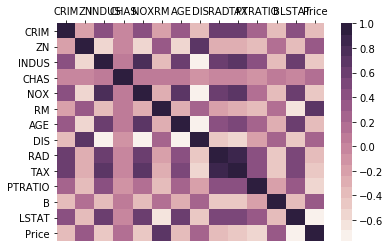

In [18]:
# The image shows the correlation between each set of value. Large positive scores between the features show that there is a strong positive correlation. We see a maximum of value 1 in all the diagonal values.
data[data.columns].corr()

ax = sns.heatmap(data[data.columns].corr(), cmap=sns.cubehelix_palette(20, light=0.95, dark=0.15))
ax.xaxis.tick_top()

# If necessary, we can remove some columns "unrelated" to price to speed up computation - we can check which features are unrelated by looking at the last row of the diagram.
# for col in ['NOX', 'RAD', 'PTRATIO', 'B']:
#     del data[col]
# data.head()

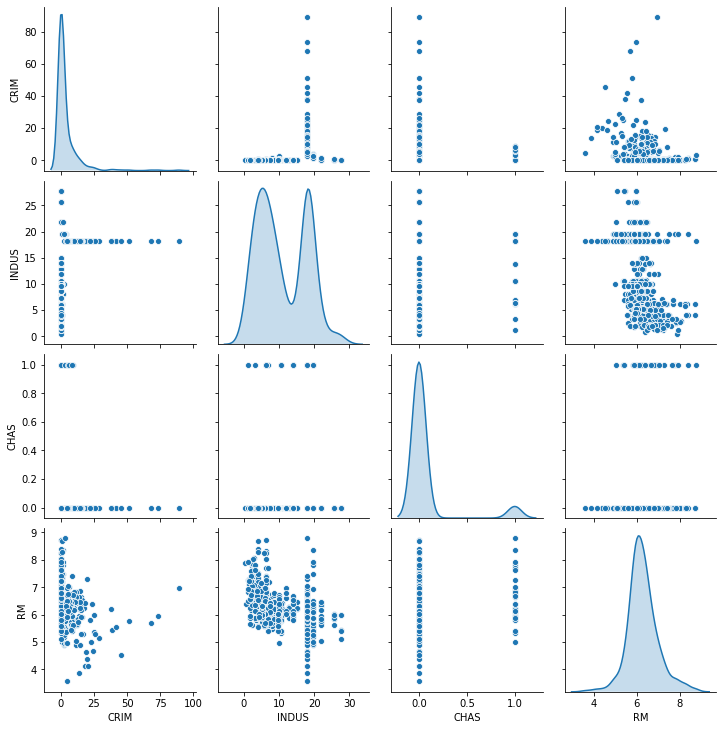

In [19]:
# We can also look at the shape of the data - here we visualise the graphs of a few columns
sns.pairplot(data[["CRIM", "INDUS", "CHAS", "RM"]], diag_kind="kde")

# RM and MEDV have the shape like that in a normally distributed graph.
# AGE is skewed to the left and LSTAT is skewed to the right.
# TAX has a large amount of distribution around the point 700.

## Next, we split the data in order to train our model

In [41]:
# Input Data - selecting the features
x = data[["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]].values
# x = pd.DataFrame(x)
print(x.shape)
# Output Data - selecting the target
y = data[["Price"]].values
# y.flatten()
y = y.reshape([506,]) 
print(y.shape)
# y = pd.DataFrame(y)
# Splitting the data into training and test sets using SciKit Learn
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.2, random_state = 0) 

# We can use an automatic function to scale our data - this helps the model to train more efficiently
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

# Displaying the shape of our train and test sets
print("xtrain shape : ", xtrain.shape) 
print("xtest shape  : ", xtest.shape) 
print("ytrain shape : ", ytrain.shape) 
print("ytest shape  : ", ytest.shape) 

(506, 13)
(506,)
xtrain shape :  (404, 13)
xtest shape  :  (102, 13)
ytrain shape :  (404,)
ytest shape  :  (102,)


## Train the first model - a linear model created using the SciKit functionality

In [42]:
# Fitting Multi-Linear regression model to training model 
regressor = LinearRegression() 
regressor.fit(xtrain, ytrain) 
   
# predicting the test set results 
y_pred = regressor.predict(xtest) 

## Plot the results
A perfectly accurate model will achive a straight line where prediction = true value

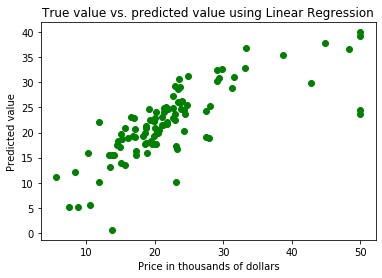

The Mean Square Error is 33.448979997676496 . This indicates our model was (100%-33%) = 67% accurate.
The model performs relatively well considering it was linear, a positive correlation can be clearly seen.
However, this model is underfitting - generalizing with a high level of bias.
Much better results can be achived with more complex models.


In [43]:
plt.scatter(ytest, y_pred, c = 'green') 
plt.xlabel("Price in thousands of dollars") 
plt.ylabel("Predicted value") 
plt.title("True value vs. predicted value using Linear Regression") 
plt.show() 
# Results of Linear Regression. 
mse = mean_squared_error(ytest, y_pred) 
print("The Mean Square Error is", mse, ". This indicates our model was (100%-33%) = 67% accurate.") 
print("The model performs relatively well considering it was linear, a positive correlation can be clearly seen.")
print("However, this model is underfitting - generalizing with a high level of bias.")
print("Much better results can be achived with more complex models.")

## Training a second model using tensorflow with tensorboard visualizations

In [76]:
# Importing and setting up tensorboard
import tensorboard
import datetime
!rm -rf ./logs/ 
%load_ext tensorboard

# Building the model. The model is five layers deep, making use of dropout to prevent overfitting, as well as
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_dim=13, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # 20% chance of dropping a nodes in each layer for a given forward pass
    tf.keras.layers.Dense(1)])
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])  # we will use the mean squared error and the mean absolute error to judge our model.
model.summary()

# Configuring Tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Training for a maximum of 1000 epochs. This functionality will stop the model if it is no longer improving
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
early_history = model.fit(xtrain, ytrain, epochs=1000, validation_split = 0.2, verbose=1, callbacks = [early_stop, tensorboard_callback])

# Displaying tensorboard
%tensorboard --logdir logs/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_51 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_52 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_53 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 65        
Total params: 13,441
Trainabl

Reusing TensorBoard on port 6006 (pid 50526), started 1 day, 1:32:09 ago. (Use '!kill 50526' to kill it.)

## Further evaluating the results

102/1 - 0s - loss: 11.8127 - mae: 2.9690 - mse: 20.3385
Testing set Mean Abs Error:  2.97 MPG
The mean squared error of  20.338526  implies our model is 80% accurate.


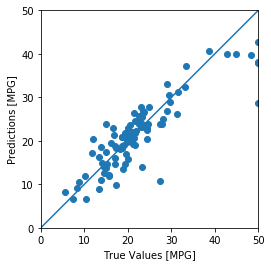

In [78]:
loss, mae, mse = model.evaluate(xtest, ytest, verbose=2)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))
test_predictions = model.predict(xtest).flatten()

a = plt.axes(aspect='equal')
plt.scatter(ytest, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
print("The mean squared error of ", mse, " implies our model is 80% accurate.")

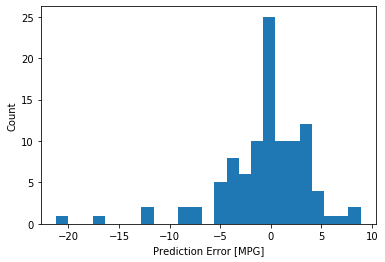

In [79]:
# looking at the errors - Gaussian standard normal distribution (good) means that the errors are random and not biased towards some certain model flaw.
error = test_predictions - ytest
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

In [80]:
# we can also use a r2 score (coefficient of determination) to gague the correlation between y_true and y_predicted
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """

    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)

    # Return the score
    return score

# displaying the r2 statistics
score = performance_metric(ytest, test_predictions)
print("A model with an R2 score of 0 always fails to predict the target variable, whereas a model with an R2 score of 1 perfectly predicts the target variable.")
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))
print("This implies", score, "of the variation is explained by the target variable.")

A model with an R2 score of 0 always fails to predict the target variable, whereas a model with an R2 score of 1 perfectly predicts the target variable.
Model has a coefficient of determination, R^2, of 0.750.
This implies 0.7502282408834575 of the variation is explained by the target variable.
